In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. DATA LOADING

In [ ]:
# Load dataset
df = pd.read_csv("student-mat.csv", sep=';')
# Display the first few rows of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


2. DATA EXPLORATION

In [ ]:
# Check for missing values
print("Missing values in each column:", df.isnull().sum())
print("Column data types:", df.dtypes)
print("Dataset shape:", df.shape)

Missing values in each column: school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Column data types: school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery   

3. DATA CLEANING

In [ ]:
 
# Check for duplicates
df.drop_duplicates(inplace=True)
print(df['sex'].unique())
print(df[['G1', 'G2', 'G3']].min(), df[['G1', 'G2', 'G3']].max())

print("Data cleaning complete- no missing values, no inconsistent values found.")

['F' 'M']
G1    3
G2    0
G3    0
dtype: int64 G1    19
G2    19
G3    20
dtype: int64
Data cleaning complete- no missing values, no inconsistent values found.


4. DATA ANALYSIS

In [ ]:
# Basic statistics
avg_g3 = df['G3'].mean()
print(f"Average final grade (G3): {avg_g3:.2f}")

above_15_count = (df['G3'] > 15).sum()
print(f"Number of students scoring above 15 in G3: {above_15_count}")

correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and G3: {correlation:.2f}")

gender_avg = df.groupby('sex')['G3'].mean()
print("\nAverage G3 by gender:\n", gender_avg)

Average final grade (G3): 10.42
Number of students scoring above 15 in G3: 40
Correlation between study time and G3: 0.10

Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


5. DATA VISUALIZATION

HISTOGRAM

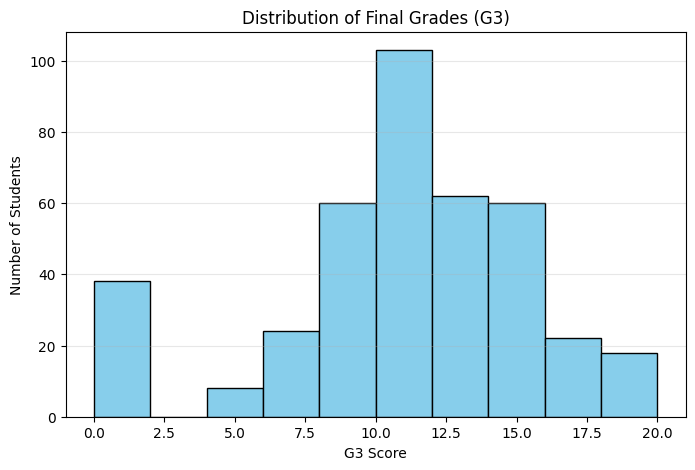

In [ ]:
 
plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("G3 Score")
plt.ylabel("Number of Students")
plt.grid(axis='y', alpha=0.3)
plt.show()

SCATTER PLOT

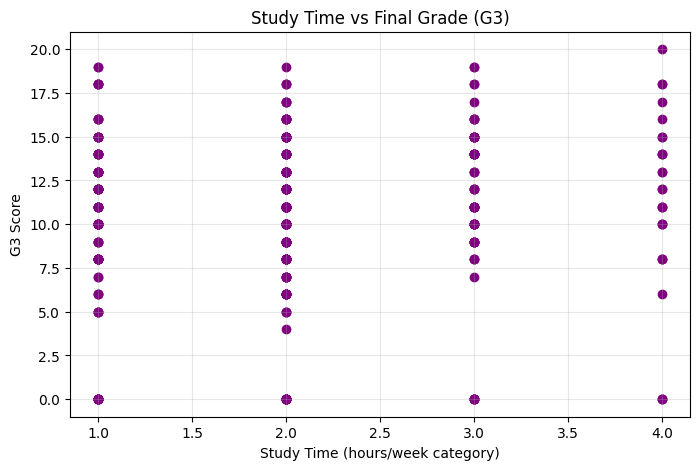

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df['studytime'], df['G3'], color='purple')
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week category)")
plt.ylabel("G3 Score")
plt.grid(alpha=0.3)
plt.show()

BAR CHART

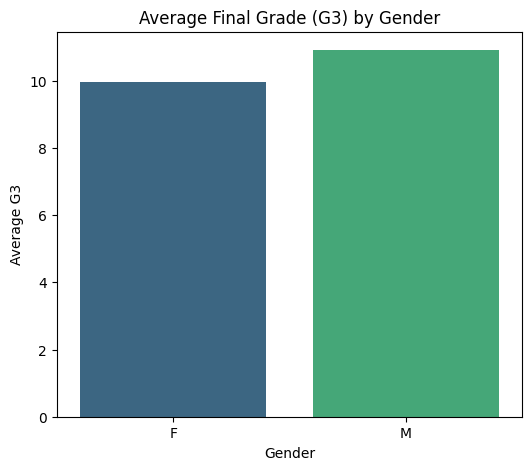

In [18]:
plt.figure(figsize=(6,5))
sns.barplot(x=gender_avg.index, y=gender_avg.values, hue=gender_avg.index, palette="viridis", legend=False)
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.show()